# SIR Modelling

In [6]:
import pandas as pd
import numpy as np

from datetime import datetime
import pandas as pd 

from scipy import optimize
from scipy import integrate

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


sns.set(style="darkgrid")

mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

In [9]:
df_analyse=pd.read_csv('COVID_small_flat_table.csv',sep=';')  
df_analyse.sort_values('date',ascending=True).tail()

,date,India,Germany,Canada
864,2022-06-04,43176817,26493235,3897530
865,2022-06-05,43181335,26496611,3898402
866,2022-06-06,43185049,26498361,3899300
867,2022-06-07,43190282,26583016,3902236
868,2022-06-08,43197522,26660652,3905978


In [10]:
df_analyse.India[35]

3

In [11]:
N0=1000000 #max susceptible population 
beta=0.8  # recovery coefficient
gamma=0.1  # Transmission coefficient
# beta/gamma is known as reproduction rate, it is chosen as 4 meaning 1 person can infect 4 people
# condition I0+S0+R0=N0
I0=df_analyse.India[35]
S0=N0-I0
R0=0

In [12]:
def SIR_model(SIR,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: 
        
        dS+dI+dR=0
        S+I+R= N (constant p0opulation size)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])

**Simulative approach to calculate SIR curves**

In [13]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})



for each_t in np.arange(100):
   
    new_delta_vec=SIR_model(SIR,beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

In [14]:
propagation_rates

,susceptible,infected,recoverd,recovered
0,999994.600007,5.099993,NaN,0.300000
1,999990.520035,8.669966,NaN,0.809999
2,999983.584128,14.738876,NaN,1.676996
3,999971.793221,25.055896,NaN,3.150883
4,999951.749070,42.594457,NaN,5.656473
5,999917.675148,72.408933,NaN,9.915919
6,999859.752771,123.090417,NaN,17.156812
7,999761.294247,209.239899,NaN,29.465854
8,999593.942286,355.667871,NaN,50.389844
9,999309.523527,604.519843,NaN,85.956631


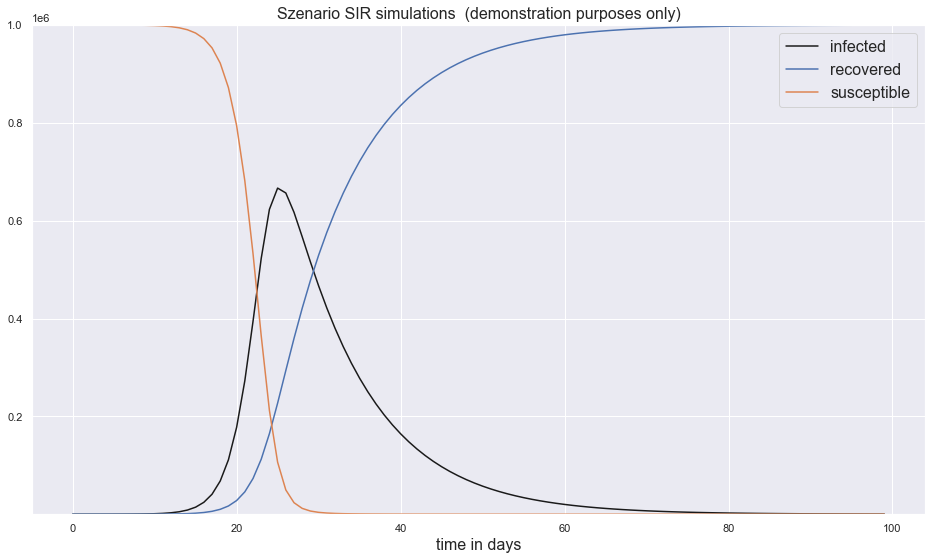

In [15]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',color='k')
ax1.plot(propagation_rates.index,propagation_rates.recovered,label='recovered')
ax1.plot(propagation_rates.index,propagation_rates.susceptible,label='susceptible')

ax1.set_ylim(10, 1000000)
ax1.set_yscale('linear')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

**SIR Modelling parameter fitting**

In [17]:
ydata = np.array(df_analyse.India[35:])
t=np.arange(len(ydata))

In [18]:
# re-initialization 
I0=ydata[0]
S0=N0-I0
R0=0
beta

0.8

In [19]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [20]:
def fit_odeint(x, beta, gamma):
    '''
    helper function for the integration
    '''
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] # only dI is expected

In [21]:
# curve for diff. equation
popt=[0.4,0.1]
fit_odeint(t, *popt)

array([ 3.00000000e+00,  4.04957048e+00,  5.46633682e+00,  7.37876085e+00,
        9.96024362e+00,  1.34448448e+01,  1.81484976e+01,  2.44976426e+01,
        3.30678681e+01,  4.46360530e+01,  6.02507210e+01,  8.13269517e+01,
        1.09774394e+02,  1.48169875e+02,  1.99990061e+02,  2.69924877e+02,
        3.64299456e+02,  4.91641619e+02,  6.63444139e+02,  8.95186820e+02,
        1.20770372e+03,  1.62900613e+03,  2.19670252e+03,  2.96119126e+03,
        3.98983761e+03,  5.37237374e+03,  7.22776349e+03,  9.71271778e+03,
        1.30318748e+04,  1.74492745e+04,  2.33000146e+04,  3.09996813e+04,
        4.10471168e+04,  5.40132778e+04,  7.05058311e+04,  9.10972501e+04,
        1.16206694e+05,  1.45937396e+05,  1.79894841e+05,  2.17042582e+05,
        2.55674455e+05,  2.93567396e+05,  3.28314029e+05,  3.57744704e+05,
        3.80294683e+05,  3.95197149e+05,  4.02468976e+05,  4.02741876e+05,
        3.97029126e+05,  3.86505277e+05,  3.72340480e+05,  3.55598141e+05,
        3.37185710e+05,  

The curves needs to be fitted. Beta and gamma are the free paramaters.

In [22]:
# To get the fitted curve
fitted=fit_odeint(t, *popt)

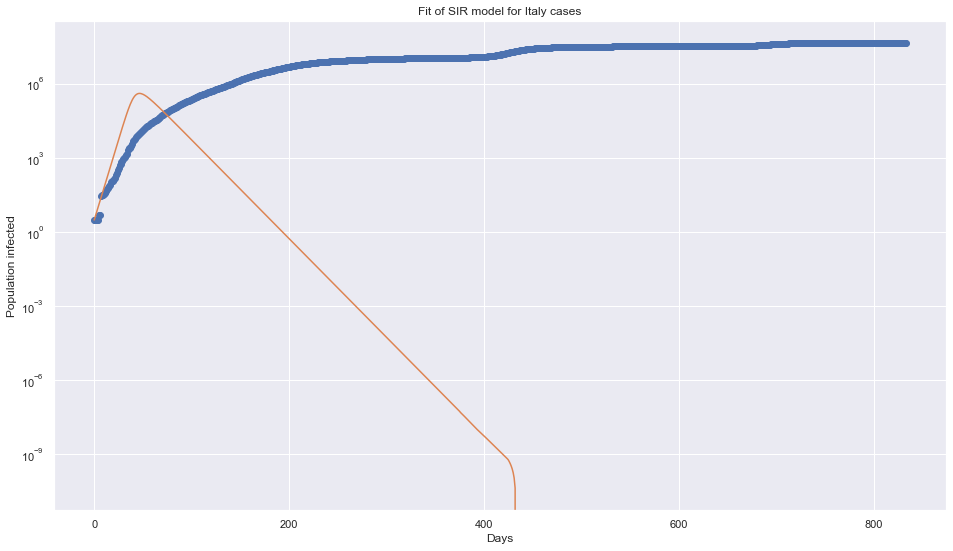

Optimal parameters: beta = 0.4  and gamma =  0.1
Basic Reproduction Number R0  4.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single in a population where all subjects are susceptible. @wiki


In [23]:
plt.semilogy(t, ydata, 'o')
plt.semilogy(t, fitted)
plt.title("Fit of SIR model for Italy cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])
print("This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single in a population where all subjects are susceptible. @wiki")

**Dynamic beta in SIR (Infection Rate)**

In [24]:
t_initial=28
t_intro_measures=14
t_hold=21
t_relax=21

beta_max=0.4
beta_min=0.11
gamma=0.1
pd_beta=np.concatenate((np.array(t_initial*[beta_max]),
                       np.linspace(beta_max,beta_min,t_intro_measures),
                       np.array(t_hold*[beta_min]),
                        np.linspace(beta_min,beta_max,t_relax),
                       ))

In [25]:
pd_beta

array([0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.37769231,
       0.35538462, 0.33307692, 0.31076923, 0.28846154, 0.26615385,
       0.24384615, 0.22153846, 0.19923077, 0.17692308, 0.15461538,
       0.13230769, 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.1245    ,
       0.139     , 0.1535    , 0.168     , 0.1825    , 0.197     ,
       0.2115    , 0.226     , 0.2405    , 0.255     , 0.2695 

In [26]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})



for each_beta in pd_beta:
   
    new_delta_vec=SIR_model(SIR,each_beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

In [27]:
propagation_rates

,susceptible,infected,recoverd,recovered
0,999995.800004,3.899996,NaN,0.300000
1,999994.240012,5.069989,NaN,0.690000
2,999992.212028,6.590974,NaN,1.196999
3,999989.575659,8.568245,NaN,1.856096
4,999986.148396,11.138683,NaN,2.712920
5,999981.692985,14.480226,NaN,3.826789
6,999975.901000,18.824188,NaN,5.274811
7,999968.371506,24.471263,NaN,7.157230
8,999958.583311,31.812333,NaN,9.604357
9,999945.858905,41.355505,NaN,12.785590


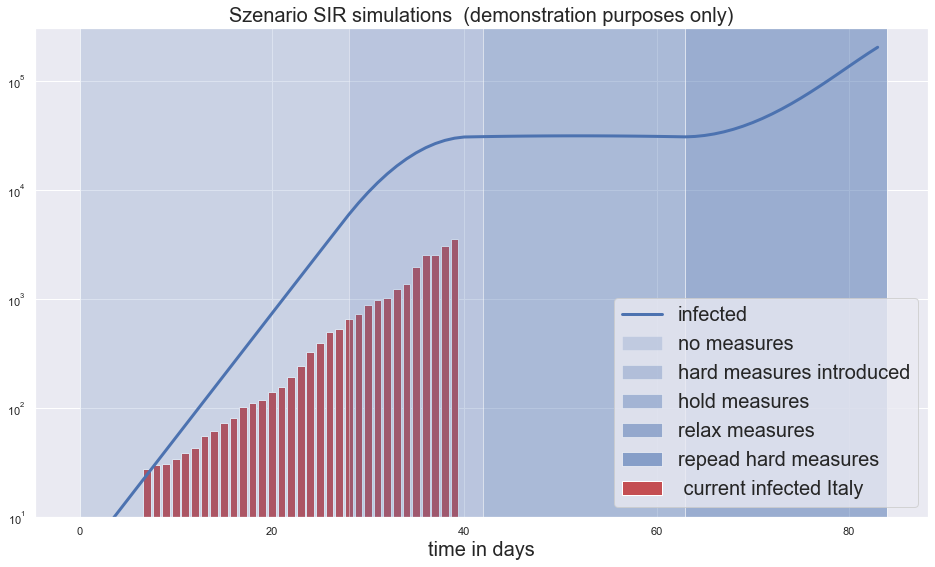

In [30]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',linewidth=3)

t_phases=np.array([t_initial,t_intro_measures,t_hold,t_relax]).cumsum()
ax1.bar(np.arange(len(ydata[0:40])),ydata[0:40],width = 0.8,label=' current infected Italy',color='r')
ax1.axvspan(0,t_phases[0], facecolor='b', alpha=0.2,label='no measures')
ax1.axvspan(t_phases[0],t_phases[1], facecolor='b', alpha=0.3,label='hard measures introduced')
ax1.axvspan(t_phases[1],t_phases[2], facecolor='b', alpha=0.4,label='hold measures')
ax1.axvspan(t_phases[2],t_phases[3], facecolor='b', alpha=0.5,label='relax measures')
ax1.axvspan(t_phases[3],len(propagation_rates.infected), facecolor='b', alpha=0.6,label='repead hard measures')

ax1.set_ylim(10, 1.5*max(propagation_rates.infected))
ax1.set_yscale('log')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=20)
ax1.set_xlabel('time in days',size=20)
ax1.legend(loc='best',
           prop={'size': 20});

In [31]:
t_phases

array([28, 42, 63, 84], dtype=int32)

# SIR fit curve - Dynamic Dashboard

* Dynamic dashoard for fit curve
* SIR curve of various countries


In [32]:
df_analyse=pd.read_csv(r"COVID_small_flat_table.csv",sep=';')  
df_analyse.sort_values('date',ascending=True).tail()

,date,India,Germany,Canada
864,2022-06-04,43176817,26493235,3897530
865,2022-06-05,43181335,26496611,3898402
866,2022-06-06,43185049,26498361,3899300
867,2022-06-07,43190282,26583016,3902236
868,2022-06-08,43197522,26660652,3905978


In [33]:
# Extracting data of desired countries
df_an = df_analyse[['date','Canada','Germany','India']]
df_an

,date,Canada,Germany,India
0,2020-01-22,0,0,0
1,2020-01-23,2,0,0
2,2020-01-24,3,0,0
3,2020-01-25,3,0,0
4,2020-01-26,3,0,0
...,...,...,...,...
864,2022-06-04,3897530,26493235,43176817
865,2022-06-05,3898402,26496611,43181335
866,2022-06-06,3899300,26498361,43185049
867,2022-06-07,3902236,26583016,43190282


In [34]:
df_an = df_an.iloc[35:,]
df_an

,date,Canada,Germany,India
35,2020-02-26,20,21,3
36,2020-02-27,22,26,3
37,2020-02-28,28,53,3
38,2020-02-29,33,66,3
39,2020-03-01,38,117,3
...,...,...,...,...
864,2022-06-04,3897530,26493235,43176817
865,2022-06-05,3898402,26496611,43181335
866,2022-06-06,3899300,26498361,43185049
867,2022-06-07,3902236,26583016,43190282


In [36]:
N0=1000000 #max susceptible population 
beta=0.4  # recovery coefficient
gamma=0.1  # Transmission coefficient

# Generating a dataframe of infected, recovered and susceptible population of the selected countries
df = pd.DataFrame()
country_list = ['Canada','Germany','India']
for country in country_list:
    I0 = df_an._get_value(35,country)
    S0=N0-I0
    R0=0
    
    dict1 = {'country': country, 'susceptible':S0, 'infected':I0,'recoverd':R0}
                                           
    
    
    df = df.append(dict1, ignore_index=True)
print(df)

   country  infected  recoverd  susceptible
0   Canada      20.0       0.0     999980.0
1  Germany      21.0       0.0     999979.0
2    India       3.0       0.0     999997.0


**Simulative approach to calculate SIR curve**

In [38]:
N0=1000000 #max susceptible population 
beta=0.4  # recovery coefficient
gamma=0.1  # Transmission coefficient
propagation_rates=pd.DataFrame(index = [country],columns={'susceptible':S0,
                                           'infected':I0,
                                           'recoverd':R0})

def SIR_model(SIR,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])

country_list = ['Canada','Germany','India']
for country in country_list:
    I0 = df_an._get_value(35,country)
    S0=N0-I0
    R0=0
    
    SIR=np.array([S0,I0,R0])
    
    for each_t in np.arange(100):
        new_delta_vec=SIR_model(SIR,beta,gamma)
   
        SIR=SIR+new_delta_vec
    
        propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)


        
print(propagation_rates.head())

     susceptible   infected  recoverd country  recovered
0            NaN        NaN       NaN     NaN        NaN
1  999972.000160  25.999840       NaN  Canada   2.000000
2  999961.600515  33.799501       NaN  Canada   4.599984
3  999948.081234  43.938832       NaN  Canada   7.979934
4  999930.506614  57.119569       NaN  Canada  12.373817


SIR_Curve-INDIA

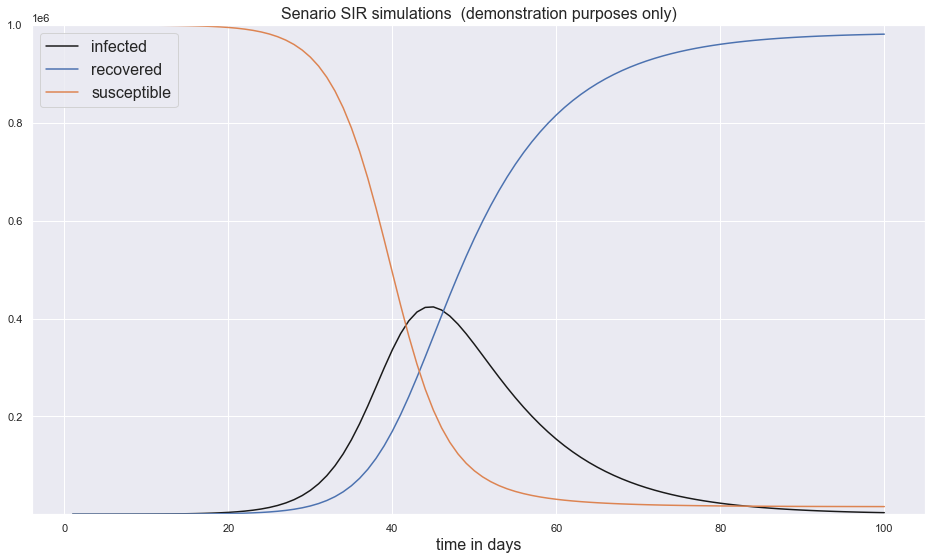

In [39]:
fig, ax1 = plt.subplots(1,1)

ax1.plot(propagation_rates.index[0:101],propagation_rates.infected[0:101],label='infected',color='k')
ax1.plot(propagation_rates.index[0:101],propagation_rates.recovered[0:101],label='recovered')
ax1.plot(propagation_rates.index[0:101],propagation_rates.susceptible[0:101],label='susceptible')

ax1.set_ylim(10, 1000000)
ax1.set_yscale('linear')
ax1.set_title('Senario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

**SIR_curve-US**

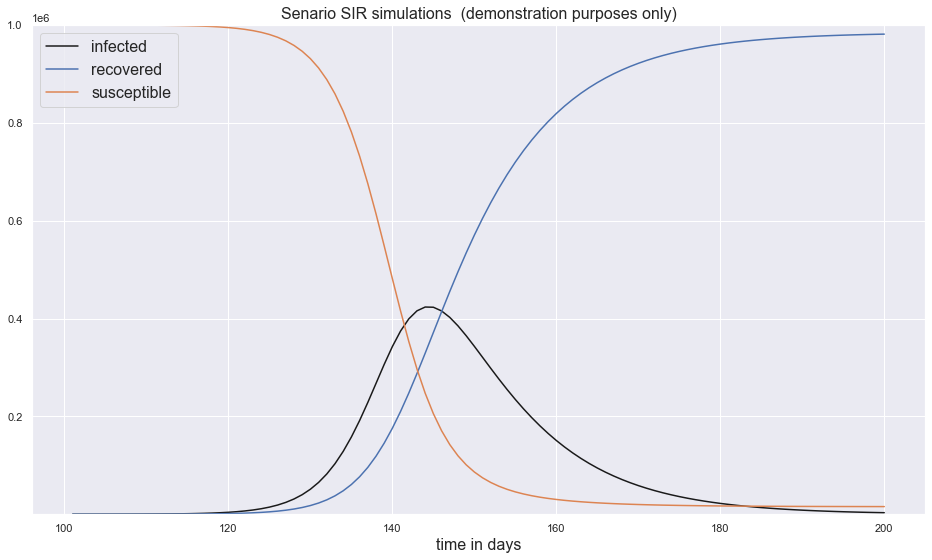

In [40]:
fig, ax1 = plt.subplots(1,1)

ax1.plot(propagation_rates.index[101:201],propagation_rates.infected[101:201],label='infected',color='k')
ax1.plot(propagation_rates.index[101:201],propagation_rates.recovered[101:201],label='recovered')
ax1.plot(propagation_rates.index[101:201],propagation_rates.susceptible[101:201],label='susceptible')

ax1.set_ylim(10, 1000000)
ax1.set_yscale('linear')
ax1.set_title('Senario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

SIR_curve- Germany

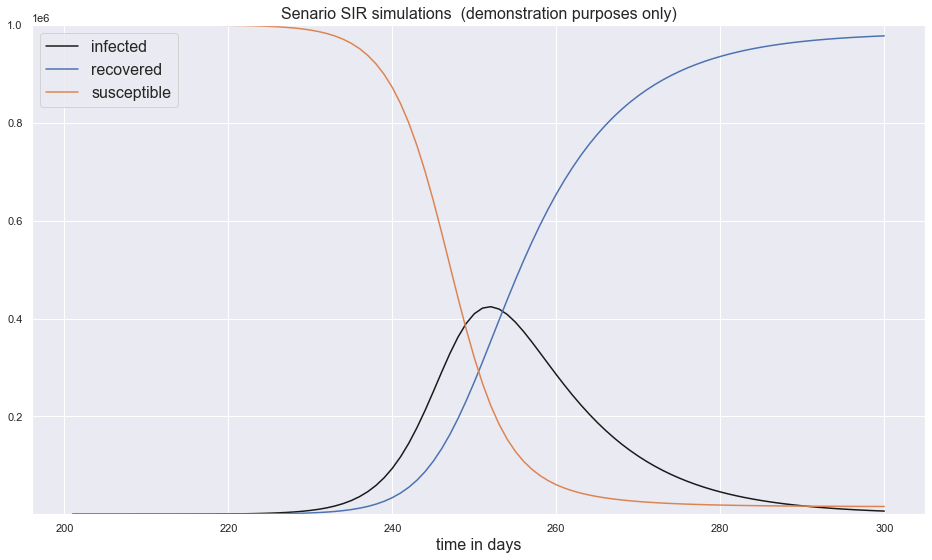

In [41]:
fig, ax1 = plt.subplots(1,1)

ax1.plot(propagation_rates.index[201:301],propagation_rates.infected[201:301],label='infected',color='k')
ax1.plot(propagation_rates.index[201:301],propagation_rates.recovered[201:301],label='recovered')
ax1.plot(propagation_rates.index[201:301],propagation_rates.susceptible[201:301],label='susceptible')

ax1.set_ylim(10, 1000000)
ax1.set_yscale('linear')
ax1.set_title('Senario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

**Fitting parameters for SIR Model**

In [42]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [43]:
def fit_odeint(x, beta, gamma):
    '''
    helper function for the integration
    '''
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] 

In [45]:
country_list = ['Canada','Germany','India']
df1 = pd.DataFrame()
for country in country_list:
    ydata = np.array(df_analyse[country][35:])
    t = np.arange(len(ydata))
    # ensure re-initialization 
    I0=ydata[0]
    S0=N0-I0
    R0=0
    beta
    
    # example curve of our differential equationa
    popt=[0.4,0.1]
    fit_odeint(t, *popt)
    
    
    popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
    perr = np.sqrt(np.diag(pcov))
    
    print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
    print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
    
    
    # get the final fitted curve
    fitted=fit_odeint(t, *popt)
    df1 = df1.append({'country': country,'t': t, 'ydata':ydata,'fitted':fitted},ignore_index=True)
print(df1.T)

C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
<ipython-input-42-20242b6e9de4>:16: RuntimeWarning: overflow encountered in double_scalars
  dS_dt=-beta*S*I/N0
<ipython-input-42-20242b6e9de4>:17: RuntimeWarning: overflow encountered in double_scalars
  dI_dt=beta*S*I/N0-gamma*I
C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


standard deviation errors :  [2.35970261e-04 2.01283509e-05]  start infect: 20
Optimal parameters: beta = 0.029233904355173645  and gamma =  -0.0027573645473824423
standard deviation errors :  [62.93105768 62.07551192]  start infect: 21
Optimal parameters: beta = 1.0991314357053588  and gamma =  0.8991435161577906
standard deviation errors :  [492.14343698 490.88738079]  start infect: 3
Optimal parameters: beta = 1.0493273570931083  and gamma =  0.9506517905591881
                                                         0  \
country                                             Canada   
fitted   [20.0, 20.65015743908808, 21.321449884683496, ...   
t        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
ydata    [20, 22, 28, 33, 38, 45, 51, 59, 71, 90, 98, 1...   

                                                         1  \
country                                            Germany   
fitted   [21.0, 25.64820791750511, 31.32429138246851, 3...   
t        [0, 1, 2, 3, 4, 5, 6, 7, 

<ipython-input-42-20242b6e9de4>:18: RuntimeWarning: overflow encountered in double_scalars
  dR_dt=gamma*I


In [46]:
df1 

,country,fitted,t,ydata
0,Canada,"[20.0, 20.65015743908808, 21.321449884683496, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[20, 22, 28, 33, 38, 45, 51, 59, 71, 90, 98, 1..."
1,Germany,"[21.0, 25.64820791750511, 31.32429138246851, 3...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[21, 26, 53, 66, 117, 150, 188, 240, 349, 534,..."
2,India,"[3.0, 3.3111084101034334, 3.6544663015580885, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[3, 3, 3, 3, 3, 5, 5, 28, 30, 31, 34, 39, 43, ..."


In [47]:
# Final dataframe
d_fin = pd.DataFrame({'timeline' : df1.t[0],'Canada_fitted': df1.fitted[0],  'Canada' : df1.ydata[0],
                  'Germany_fitted': df1.fitted[1],  'Germany' : df1.ydata[1],
                  'India_fitted': df1.fitted[2], 'India' : df1.ydata[2]})

d_fin

,timeline,Canada_fitted,Canada,Germany_fitted,Germany,India_fitted,India
0,0,2.000000e+01,20,2.100000e+01,21,3.000000e+00,3
1,1,2.065016e+01,22,2.564821e+01,26,3.311108e+00,3
2,2,2.132145e+01,28,3.132429e+01,53,3.654466e+00,3
3,3,2.201456e+01,33,3.825507e+01,66,4.033414e+00,3
4,4,2.273021e+01,38,4.671718e+01,117,4.451636e+00,3
...,...,...,...,...,...,...,...
829,829,3.909530e+06,3897530,-4.260491e-14,26493235,-7.806270e-12,43176817
830,830,3.920325e+06,3898402,-4.257842e-14,26496611,-7.686651e-12,43181335
831,831,3.931149e+06,3899300,-4.255193e-14,26498361,-7.567031e-12,43185049
832,832,3.942004e+06,3902236,-4.252544e-14,26583016,-7.447411e-12,43190282


**Curve for Italy**

* Original and fitted population

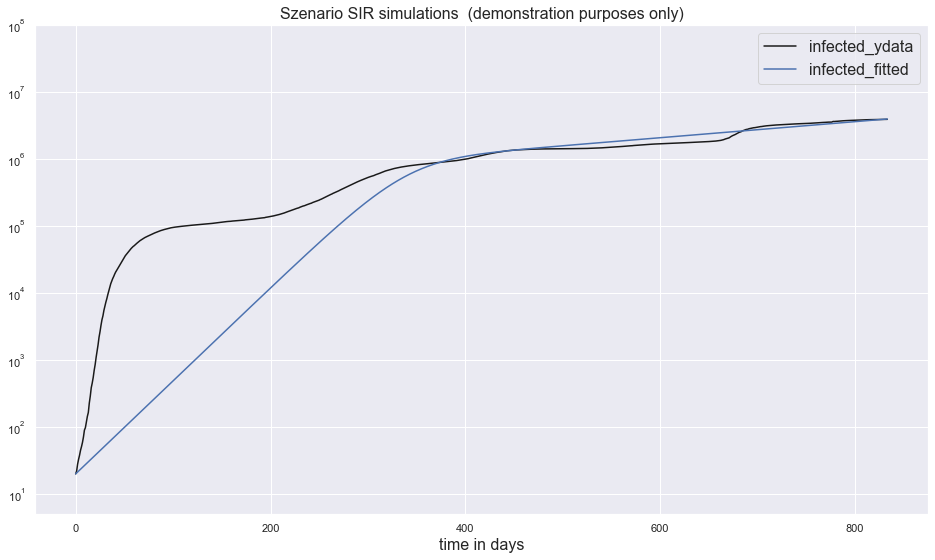

In [48]:
fig, ax1 = plt.subplots(1,1)

ax1.plot(df1.t[0],df1.ydata[0],label='infected_ydata',color='k')
ax1.plot(df1.t[0],df1.fitted[0],label='infected_fitted')

ax1.set_ylim(5, 100000000)
ax1.set_yscale('log')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

**Curve for Germany**

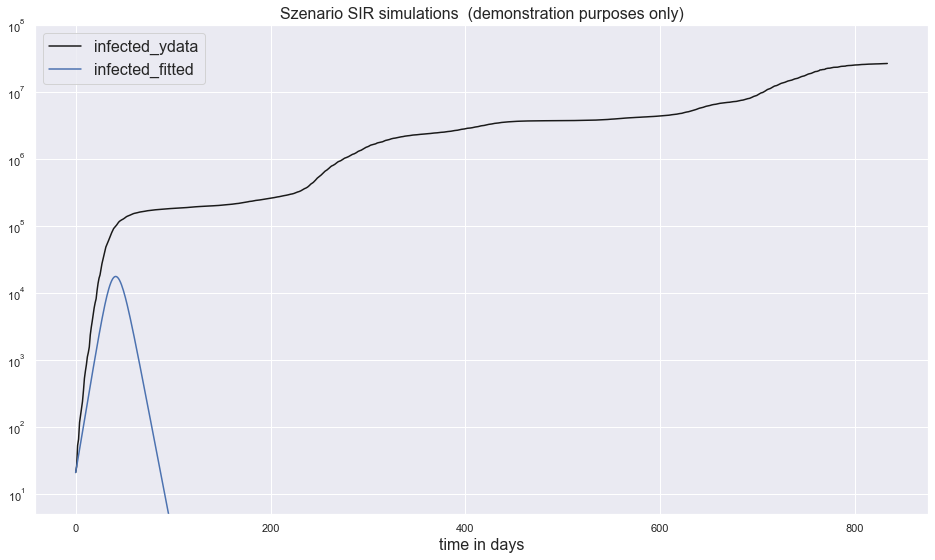

In [49]:
fig, ax1 = plt.subplots(1,1)

ax1.plot(df1.t[1],df1.ydata[1],label='infected_ydata',color='k')
ax1.plot(df1.t[1],df1.fitted[1],label='infected_fitted')

ax1.set_ylim(5, 100000000)
ax1.set_yscale('log')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

**Curve for India**

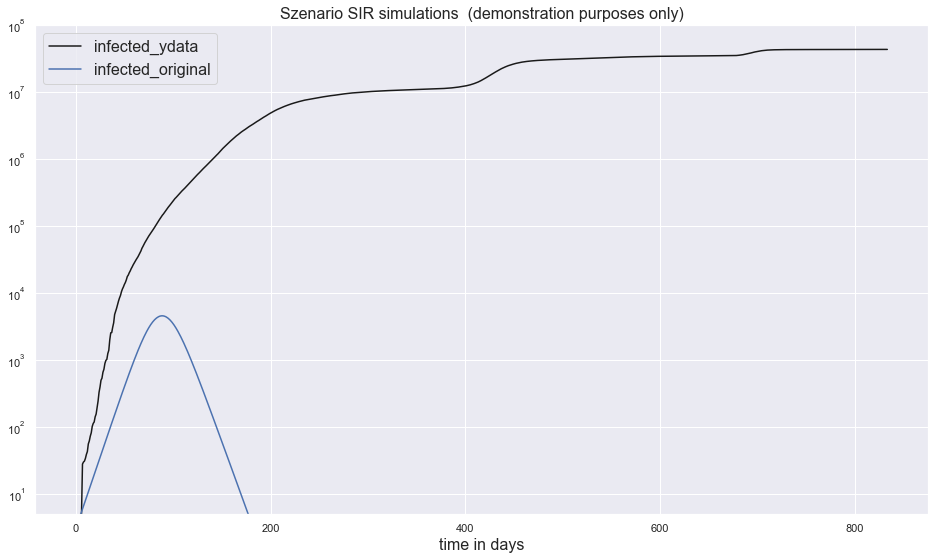

In [50]:
fig, ax1 = plt.subplots(1,1)

ax1.plot(df1.t[2],df1.ydata[2],label='infected_ydata',color='k')
ax1.plot(df1.t[2],df1.fitted[2],label='infected_original')

ax1.set_ylim(5, 100000000)
ax1.set_yscale('log')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});


# Dynamic Dashboard

* Use of Dash Plotly

In [51]:
country_list = ['Canada','Germany','India']
country_list

['Canada', 'Germany', 'India']

In [53]:

import pandas as pd
import numpy as np

import dash
dash.__version__
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output,State

import plotly.graph_objects as go

import os



fig = go.Figure()

app = dash.Dash()
app.layout = html.Div([
    dcc.Markdown('''
    #  Dynamic Dashboard
    (Using Dash Plotly)

    Goal of the exercise is to select and visualize the fit of different countries.

    '''),
    
   
    html.Br(),
    html.Br(),

    dcc.Dropdown(
        id='country_drop_down',
        options=[ {'label': 'Canada','value':'Canada'},
                  {'label': 'Germany','value':'Germany'},
                  {'label': 'India','value':'India'}],
        value=['Italy'],# which are pre-selected
        placeholder = 'Multi-Select Country for Visualization',
        multi=True
    ),


    dcc.Graph(figure=fig, id='main_window_slope')
])

In [54]:
@app.callback(Output('main_window_slope', 'figure'),[Input('country_drop_down', 'value')])

def update_figure(country_list):
    
    traces = []
    for each in country_list:
        traces.append(dict(x=d_fin.timeline,y=d_fin[str(each + '_fitted')],mode='markers+lines',opacity=0.9,name=str(each+"_fitted")))
            
        traces.append(dict(x=d_fin.timeline,y=d_fin[each],mode='markers+lines',opacity=0.9,name= str(each+"_ydata")))

    return {
            'data': traces,
            'layout': dict(width=1280,height=720, title = 'Infected along with fit curve',
                            xaxis={'title':'Timeline','tickangle':-45,'nticks':20,'tickfont':dict(size=14,color="#7f7f7f")},
                            yaxis= {'type':"log",'range':'[1.1,5.5]'})}

In [ ]:
if __name__ == '__main__':

    app.run_server(port = 4086,debug=True, use_reloader=False)

Dash is running on http://127.0.0.1:4086/

Dash is running on http://127.0.0.1:4086/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
